In [146]:
import numpy as np
import matplotlib.pyplot as plt
import os
from pathlib import Path

In [215]:
data_directory = Path('demo-benchmark-simulation-freq1600-2000')
data_directory = Path('demo-benchmark-simulation-freq2000-2300')
data_directory = Path('demo-benchmark-simulation-freq2300-2600')

data_files = list(data_directory.glob('**/*.txt'))

In [216]:
data = np.loadtxt(data_files[2])

In [217]:
np.median(data)

132.589286

In [149]:
np.mean(np.abs(data - np.median(data)))

3.752678585

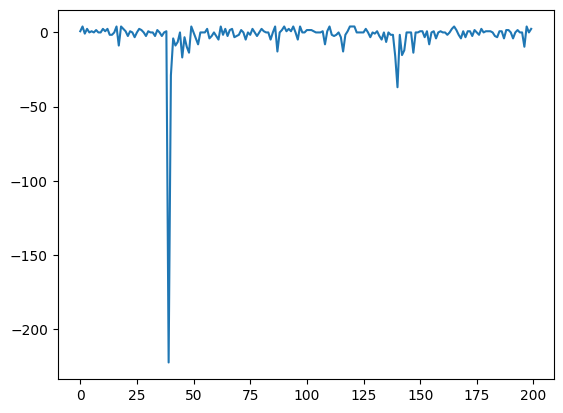

In [150]:
plt.plot(data - np.median(data))

In [151]:
from copy import deepcopy

def make_window(source, win_length):
    ret_data = np.empty((np.size(source) - win_length, win_length))
    for wind_ind in range(win_length):
        ret_data[:, wind_ind] = source[wind_ind:-(win_length-wind_ind)]

    return ret_data

def remove_jumps(source, jump_reject):
    filter = np.concatenate((np.diff(source) > jump_reject, [False], ))
    data_ret = deepcopy(source)
    data_ret[filter] = np.nan
    return data_ret
    
def remove_jumps_fore(source, jump_reject):
    filter = np.concatenate(([False], np.diff(source) > jump_reject))
    data_ret = deepcopy(source)
    data_ret[filter] = np.nan
    return data_ret

def remove_from_med(source, reject_dist):
    filter = np.abs(source - np.median(source)) > reject_dist
    data_ret = deepcopy(source)
    data_ret[filter] = np.nan
    return data_ret

def window_median(source, window_length, reject_jump):
    source_window = make_window(source, window_length)
    length = np.shape(source_window)[0]
    data_ret = np.empty(length)

    for wind_ind in range(length):
        this_wind = source_window[wind_ind, :]
        diff = this_wind - np.median(this_wind)
        this_wind[np.abs(diff > reject_jump)] = np.nan
        data_ret[wind_ind] = np.nanmedian(this_wind)

    return data_ret

def window_mean(source, window_length, reject_jump):
    source_window = make_window(source, window_length)
    length = np.shape(source_window)[0]
    data_ret = np.empty(length)

    for wind_ind in range(length):
        this_wind = source_window[wind_ind, :]
        diff = this_wind - np.median(this_wind)
        this_wind[np.abs(diff > reject_jump)] = np.nan
        data_ret[wind_ind] = np.nanmean(this_wind)

    return data_ret

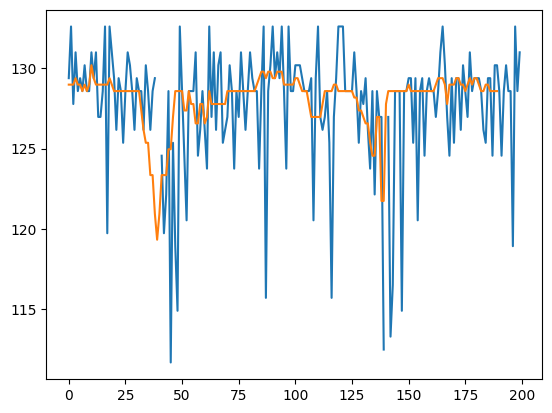

In [162]:
window_length = 10
jump_reject = 20

# plt.plot(data)

data_nojumps = remove_from_med(data, jump_reject)
data_wind = make_window(data_nojumps, win_length=window_length)
plt.plot(data_nojumps)

# data_clean = np.nanmean(data_wind, axis=1)
data_clean = window_median(data, window_length, jump_reject)

plt.plot(data_clean)

# plt.plot(window_median(data_nojumps, window_lengt, 20))
# plt.plot(window_mean(data_nojumps, 5, 20))

In [163]:
np.mean(np.abs(data_clean - np.median(data)))

0.9198778078947346

In [244]:
def post_process_data(source_dir, window_length, jump_reject = 20):
    data_files = list(Path(source_dir).glob('**/*.txt'))
    source_data = np.loadtxt(data_files[2])

    return window_median(source_data, window_length, jump_reject)

def mae(source, target):
    return np.mean(np.abs(source - target))

In [248]:
print(
    mae(post_process_data('demo-benchmark-simulation-freq1600-2000', 25), 128.571429),
    mae(post_process_data('demo-benchmark-simulation-freq2000-2300', 25), 129.375),
    mae(post_process_data('demo-benchmark-simulation-freq2300-2600', 25), 132.589286)
)

0.4729592285714281 0.24795905142857302 0.652040720000003
